In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('C:/DS/Data/PCA.csv')  # handwritten digit image of 28 * 28 px

In [22]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24904,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


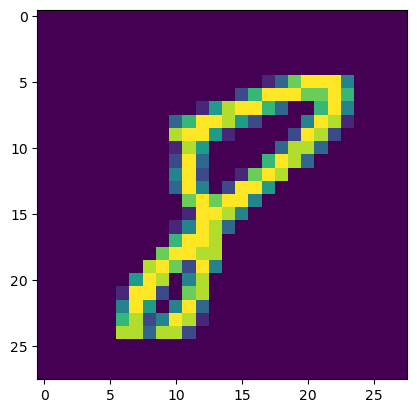

In [50]:
plt.imshow(df.iloc[18306, 1:].values.reshape(28,28))

In [3]:
df.shape

(42000, 785)

In [92]:
X = df.drop(columns=['label'])
y = df['label']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
import time
start = time.time()

y_pred = knn.predict(X_test)  # took so long coz many features
print(time.time() - start)


14.817282915115356


In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.9648809523809524

# PCA

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)  # creates 100 PCA 

In [110]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=47 with svd_solver='covariance_eigh'

In [111]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [112]:
y_pred = knn.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)  # just with 100 columns

0.9727380952380953

In [ ]:
acc = []
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)
    acc.append(accuracy_score(y_test, y_pred))



ValueError: <built-in function max> is not in list

In [99]:
maxi = max(acc)

In [102]:
maxi

0.9732142857142857

In [100]:
acc.index(maxi)

47